# INFO 3401 – Module Assignment 4

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This is the sole component for Module Assignment 4: there are no sub-assignments. This assignment is due Wednesday, October 28 by 11:59pm on Canvas. Please submit as an HTML file: File > Download as > HTML (.html).


In [1]:
# Our usual libraries for working with data
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

# Our usual libraries for visualizing data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sb

# Spatial libaries
import geopandas as gpd
import geoplot, contextily

## Read in data

### Sales data
Read in the "colorado_monthly_cannabis_sales.csv" file as `sales_df`.

In [2]:
sales_df = pd.read_csv("colorado_monthly_cannabis_sales.csv")

Print out the number of rows and show the tail of `sales_df`.

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5398 non-null   object 
 1   County  5398 non-null   object 
 2   Sales   3444 non-null   float64
 3   Type    5398 non-null   object 
dtypes: float64(1), object(3)
memory usage: 168.8+ KB


In [4]:
sales_df.head()

,Time,County,Sales,Type
0,2014-01,Adams,683098.0,Medical
1,2014-01,Pueblo,419894.0,Medical
2,2014-01,Routt,239509.0,Medical
3,2014-01,San Miguel,164384.0,Medical
4,2014-01,Sedgwick,NaN,Medical


In [5]:
sales_df.tail()

,Time,County,Sales,Type
5393,2020-08,Huerfano,506634.0,Recreational
5394,2020-08,Jefferson,5805803.0,Recreational
5395,2020-08,Lake,449116.0,Recreational
5396,2020-08,Garfield,2538125.0,Recreational
5397,2020-08,Bent,NaN,Recreational


### Crime data

Read in the "co_county_crime.csv" file as `crime_df`.

In [6]:
crime_df = pd.read_csv("co_county_crime.csv")

Print out the number of rows and show the tail of `crime_df`.

In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     10668 non-null  object 
 1   County   10668 non-null  object 
 2   Type     10668 non-null  object 
 3   Arrests  10668 non-null  float64
dtypes: float64(1), object(3)
memory usage: 333.5+ KB


In [8]:
crime_df.head()

,Time,County,Type,Arrests
0,2013-01,Adams,DUI,301.0
1,2013-01,Adams,Narcotics,232.0
2,2013-01,Alamosa,DUI,0.0
3,2013-01,Alamosa,Narcotics,1.0
4,2013-01,Arapahoe,DUI,84.0


In [9]:
crime_df.tail()

,Time,County,Type,Arrests
10663,2019-12,Washington,Narcotics,0.0
10664,2019-12,Weld,DUI,65.0
10665,2019-12,Weld,Narcotics,71.0
10666,2019-12,Yuma,DUI,0.0
10667,2019-12,Yuma,Narcotics,0.0


### County shapefile

Read in the "co_counties" shapefiles as `co_counties_gdf`.

In [10]:
co_counties_gdf = gpd.read_file("co_counties/co_counties.shp")

Show the CRS.

In [11]:
co_counties_gdf.crs

{'init': 'epsg:4326'}

Print out the number of rows and show the tail of `co_counties_gdf`.

In [12]:
len(co_counties_gdf)

64

In [13]:
co_counties_gdf.tail()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry
59,101.0,PUEBLO,63148.0,159063.0,6.206416e+09,334853.177401,0.0,0.0,"POLYGON ((-104.05410 38.52218, -104.05436 38.5..."
60,103.0,RIO BLANCO,2626.0,6666.0,8.356260e+09,472176.056913,0.0,0.0,"POLYGON ((-107.80151 40.22250, -107.76365 40.2..."
61,121.0,WASHINGTON,1980.0,4814.0,6.535833e+09,351598.108603,0.0,0.0,"POLYGON ((-102.77997 40.43842, -102.78005 40.4..."
62,123.0,WELD,89849.0,252825.0,1.039621e+10,486242.951314,0.0,0.0,"MULTIPOLYGON (((-103.57413 40.99985, -103.5736..."
63,125.0,YUMA,3947.0,10043.0,6.137023e+09,321423.270613,0.0,0.0,"POLYGON ((-102.05155 40.43985, -102.05136 40.4..."


## Feature engineering

### Sales data
In `sales_df`, cast the values in the "Month" column from strings to `pd.Timestamp` or `pd.Period` objects using an appropriate pandas function.

In [14]:
sales_df["Time"] = pd.to_datetime(sales_df["Time"])

In [15]:
sales_df["Time"]

0      2014-01-01
1      2014-01-01
2      2014-01-01
3      2014-01-01
4      2014-01-01
          ...    
5393   2020-08-01
5394   2020-08-01
5395   2020-08-01
5396   2020-08-01
5397   2020-08-01
Name: Time, Length: 5398, dtype: datetime64[ns]

In [16]:
sales_df.rename(columns={"Time":"Month"},inplace=True)
sales_df

,Month,County,Sales,Type
0,2014-01-01,Adams,683098.0,Medical
1,2014-01-01,Pueblo,419894.0,Medical
2,2014-01-01,Routt,239509.0,Medical
3,2014-01-01,San Miguel,164384.0,Medical
4,2014-01-01,Sedgwick,NaN,Medical
...,...,...,...,...
5393,2020-08-01,Huerfano,506634.0,Recreational
5394,2020-08-01,Jefferson,5805803.0,Recreational
5395,2020-08-01,Lake,449116.0,Recreational
5396,2020-08-01,Garfield,2538125.0,Recreational


NaNs are present in the "Sales" column if there are 3 or fewer dispensaries in a county in a given month to protect their confidentiality: 

> "Per §39-21-113(4), C.R.S., data derived from taxpayer returns is aggregated in order to protect the confidentiality of individual taxpayers. It is the Department’s practice to release aggregated data only when there are at least three taxpayers in a given category and none of them represents more than 80% of the total.

This is a good case for keeping rather than dropping NaNs: because a county doesn't report sales doesn't mean that it's not a legal county with dispensaries and sales.

### Crime data

In `crime_df`, cast the values in the "Month" column from strings to `pd.Timestamp` or `pd.Period` objects using an appropriate pandas function.

In [17]:
crime_df.rename(columns={"Time":"Month"},inplace=True)
crime_df["Month"] = pd.to_datetime(crime_df["Month"])
crime_df["Month"]

0       2013-01-01
1       2013-01-01
2       2013-01-01
3       2013-01-01
4       2013-01-01
           ...    
10663   2019-12-01
10664   2019-12-01
10665   2019-12-01
10666   2019-12-01
10667   2019-12-01
Name: Month, Length: 10668, dtype: datetime64[ns]

### Counties data

Convert the "county" column in `co_counties_gdf` to title-case ([hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html)) and show the head after the change.

In [18]:
co_counties_gdf["county"] = co_counties_gdf["county"].str.title()
co_counties_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9..."
1,3.0,Alamosa,6008.0,15445.0,1.872295e+09,177555.351470,0.0,0.0,"POLYGON ((-105.59917 37.75216, -105.51619 37.7..."
2,5.0,Arapahoe,225124.0,572003.0,2.084863e+09,335003.471310,0.0,0.0,"MULTIPOLYGON (((-103.70653 39.73986, -103.7066..."
3,7.0,Archuleta,5257.0,12084.0,3.504795e+09,263558.683443,0.0,0.0,"POLYGON ((-107.12854 37.42287, -107.12881 37.3..."
4,11.0,Bent,1835.0,6499.0,3.990976e+09,254662.200852,0.0,0.0,"POLYGON ((-102.74208 38.26675, -102.74211 38.2..."


## Exploratory analysis

### Sales data
How many times does each county appear in `sales_df`?

In [19]:
sales_gb = sales_df.groupby("County").agg({"Month":"count"})
sales_gb.head()

,Month
County,
Adams,160
Alamosa,80
Arapahoe,151
Archuleta,129
Bent,11


Make a histogram of the "Sales" values in `sales_df`. This might be highly-skewed, so experiment with using log-scaled bins and x-axis: try passing `np.logspace(3,8,25)` to the "bins" parameter and set the xscale to "log" ([hint](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xscale.html)). Make sure to label your axes. Real extra credit if you can format the x-axis to have more interpretable ticks too ([hint](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/tick-formatters.html)).

Text(0, 0.5, 'Count')

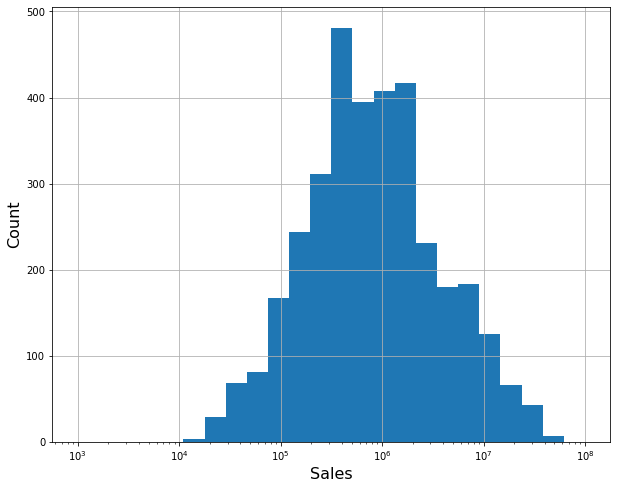

In [20]:
f,ax = plt.subplots(figsize=(10,8))

sales_df["Sales"].hist(bins=np.logspace(3,8,25),ax=ax).set_xscale("log")
plt.xlabel("Sales",fontsize=16)
plt.ylabel("Count",fontsize=16)

Interpret the histogram. What is the most common monthly sales value?

It looks like the most common monthly sales value is around $500,000. The highest monthly sales value is around $50,000,000 with the lowest a little above $10,000.

Reshape the data with "Time" in the index and "Medical" and "Recreational" as columns and the total number of sales as values. Save the resulting reshape as `monthly_sales_pivot`. You can do this with a pivot table or a groupby-aggregation. Show the tail of this reshaped DataFrame.

In [21]:
monthly_sales_pivot = pd.pivot_table(data=sales_df,
                             index = "Month",
                             columns="Type",
                             values="Sales",
                             aggfunc="sum"    
                        )
monthly_sales_pivot.tail()

Type,Medical,Recreational
Month,,
2020-04-01,34996438.0,108687035.0
2020-05-01,41458783.0,144280917.0
2020-06-01,39628326.0,152754961.0
2020-07-01,41985544.0,176676875.0
2020-08-01,40904451.0,169071513.0


Make a lineplot of total medical and recreational cannabis sales by month using the DataFrame above. Label your axes and title. Real extra credit if you can format the y-axis to have more interpretable ticks too ([hint](https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html)).

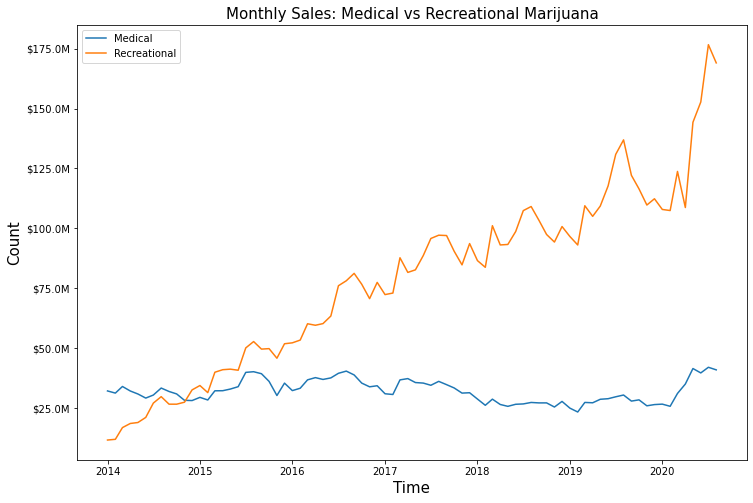

In [22]:
from matplotlib.ticker import FuncFormatter
x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

# this code taken from the hint above
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

f,ax = plt.subplots(figsize=(12,8))

ax.yaxis.set_major_formatter(formatter)

plt.plot(monthly_sales_pivot["Medical"])
plt.plot(monthly_sales_pivot["Recreational"])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Monthly Sales: Medical vs Recreational Marijuana",fontsize=15)
plt.legend(["Medical","Recreational"])

Pick a county in Colorado and filter original sales DataFrame to only that county's values. Note that not all counties permit medical and/or recreational sales and thus may not be present in the data or they have changed their policies over time creating gaps. Make sure to pick a county with recreational sales. Reshape the data to include recreational and medical like we did above. Save the result as `county_monthly_sales_pivot`. Show the tail of this data.

In [23]:
county_monthly_sales_pivot = pd.pivot_table(data=sales_df[sales_df["County"]=="Boulder"],
                             index = "Month",
                             columns="Type",
                             values="Sales",
                             aggfunc="sum"    
                        )
county_monthly_sales_pivot.tail()

Type,Medical,Recreational
Month,,
2020-04-01,1157461.0,8099503.0
2020-05-01,1258072.0,10018004.0
2020-06-01,1306408.0,10759641.0
2020-07-01,1309949.0,12593191.0
2020-08-01,1356988.0,12547631.0


Visualize the county-level data over time as a line plot like we did above.

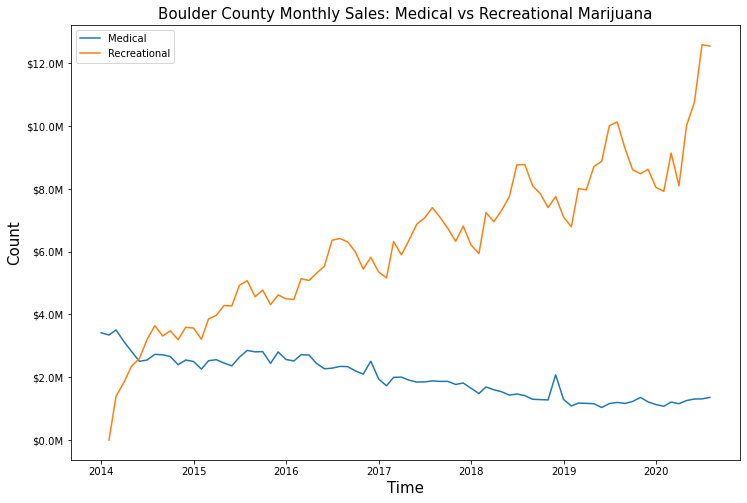

In [24]:
x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

# this code taken from the hint above
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

f,ax = plt.subplots(figsize=(12,8))

ax.yaxis.set_major_formatter(formatter)


plt.plot(county_monthly_sales_pivot["Medical"])
plt.plot(county_monthly_sales_pivot["Recreational"])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Boulder County Monthly Sales: Medical vs Recreational Marijuana",fontsize=15)
plt.legend(["Medical","Recreational"])

### Crime data

How many times does each county appear in `crime_df`?

In [25]:
crime_gb = crime_df.groupby("County").agg({"Arrests":"count"})
crime_gb

,Arrests
County,
Adams,168
Alamosa,168
Arapahoe,168
Archuleta,168
Baca,168
...,...
Summit,168
Teller,168
Washington,168


Reshape the data with "Time" in the index and "DUI" and "Narcotics" as columns and the total number of arrests as values. You can do this with a pivot table or a groupby-aggregation. Save the result as `monthly_crime_pivot` and show the tail.

In [26]:
monthly_crime_pivot = pd.pivot_table(data=crime_df,
                                    index="Month",
                                    columns="Type",
                                    values="Arrests",
                                     aggfunc="sum"
                                    )
monthly_crime_pivot.tail()

Type,DUI,Narcotics
Month,,
2019-08-01,1871.0,1475.0
2019-09-01,1683.0,1449.0
2019-10-01,1581.0,1411.0
2019-11-01,1762.0,1283.0
2019-12-01,1718.0,1185.0


Make a lineplot of total DUI and Narcotics arrests by month using `monthly_crime_pivot`. Label your axes and title.

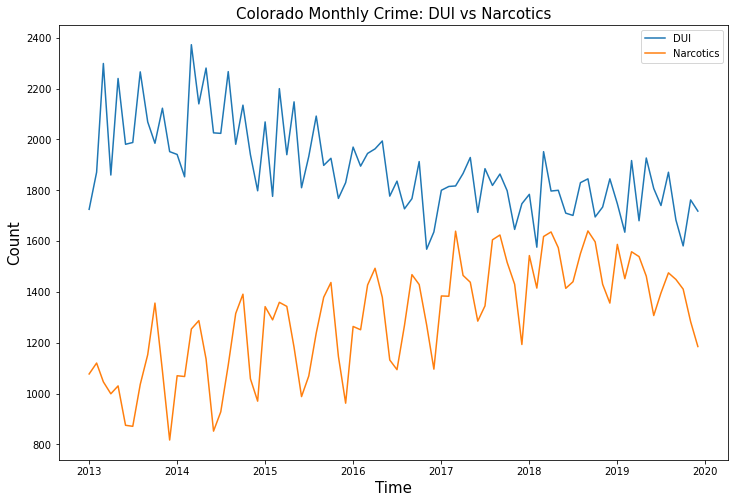

In [27]:
f,ax = plt.subplots(figsize=(12,8))

plt.plot(monthly_crime_pivot["DUI"])
plt.plot(monthly_crime_pivot["Narcotics"])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Colorado Monthly Crime: DUI vs Narcotics",fontsize=15)
plt.legend(["DUI","Narcotics"])

Pick a county in Colorado and filter the crime DataFrame to only that county's values. Reshape the data to include DUIs and Narcotics like we did above. Save as `county_monthly_crime_pivot`. Show the tail of this data.

In [28]:
county_monthly_crime_pivot = pd.pivot_table(data=crime_df[crime_df["County"]=="Boulder"],
                                    index="Month",
                                    columns="Type",
                                    values="Arrests"
                                    
                                    )
county_monthly_crime_pivot.tail()

Type,DUI,Narcotics
Month,,
2019-08-01,44.0,60.0
2019-09-01,52.0,94.0
2019-10-01,43.0,70.0
2019-11-01,47.0,55.0
2019-12-01,50.0,68.0


Visualize the county-level data over time as a line plot like we did above.

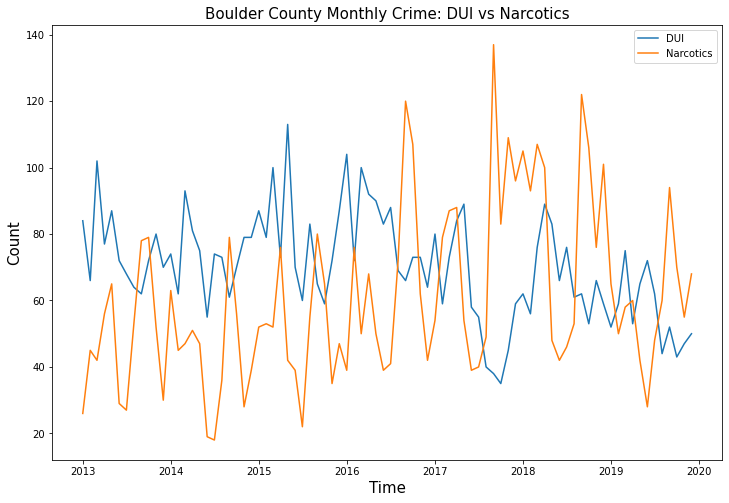

In [29]:
f,ax = plt.subplots(figsize=(12,8))

plt.plot(county_monthly_crime_pivot["DUI"])
plt.plot(county_monthly_crime_pivot["Narcotics"])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Boulder County Monthly Crime: DUI vs Narcotics",fontsize=15)
plt.legend(["DUI","Narcotics"])

### Combine both state-level datasets

Use `pd.merge` to combine the reshaped state-level DataFrames using an "inner" join called `combined_df` and inspect.

In [30]:
combined_df = pd.merge(left=monthly_crime_pivot,
                      right=monthly_sales_pivot,
                      how="inner",
                       on="Month"
                      )
combined_df.head()

Type,DUI,Narcotics,Medical,Recreational
Month,,,,
2014-01-01,1941.0,1070.0,32105349.0,11606429.0
2014-02-01,1853.0,1067.0,31203950.0,11905758.0
2014-03-01,2373.0,1254.0,33964665.0,16799118.0
2014-04-01,2140.0,1287.0,32079528.0,18520452.0
2014-05-01,2281.0,1136.0,30832970.0,18920521.0


Create a new normalized DataFrame called `normalized_df` by [dividing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.divide.html) by the January 2014 values in each column.

In [31]:
normalized_df = combined_df.div(combined_df.iloc[0])

Inspect the head of `normalized_df` to confirm the January 1, 2014 values are 1.

In [32]:
normalized_df.head()

Type,DUI,Narcotics,Medical,Recreational
Month,,,,
2014-01-01,1.000000,1.000000,1.000000,1.000000
2014-02-01,0.954663,0.997196,0.971924,1.025790
2014-03-01,1.222566,1.171963,1.057913,1.447398
2014-04-01,1.102524,1.202804,0.999196,1.595706
2014-05-01,1.175167,1.061682,0.960369,1.630176


Using `normalized_df`, make a line plot with the normalized DUI and Recreational values.

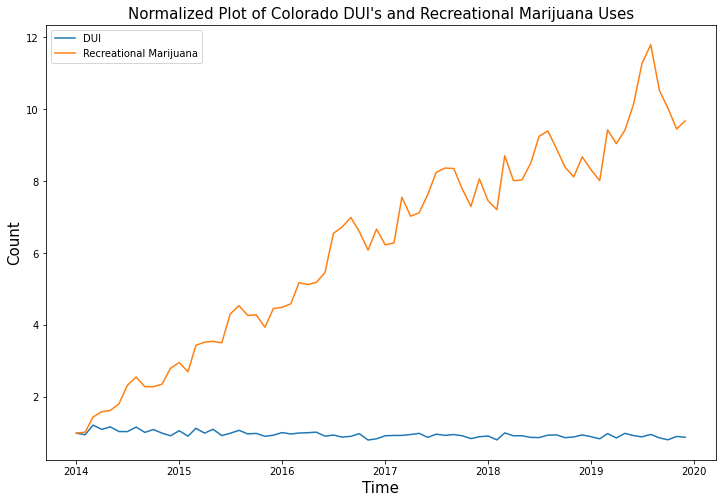

In [33]:
f,ax = plt.subplots(figsize=(12,8))

plt.plot(normalized_df["DUI"])
plt.plot(normalized_df["Recreational"])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Normalized Plot of Colorado DUI's and Recreational Marijuana Uses",fontsize=15)
plt.legend(["DUI","Recreational Marijuana"])

Is this a helpful visualization? Why or why not?

I would say yes and no. It is helpful in the sense that it shows us how much recreational marijuana usage has grown in the past 6 years. However, it really doesn't make sense to also be plotting a normalized DUI lineplot because this doesn't show us anything. I suppose the graph is actually very helpful in showing that there is no correlation between the increase of recreational usage of marijuana and the number of DUI's.

Compute the [correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) between the columns in `normalized_df`. (The values are symmetrical around the diagonal.) Pick two different values and interpret them.

In [34]:
normalized_df.corr()

Type,DUI,Narcotics,Medical,Recreational
Type,,,,
DUI,1.000000,-0.240662,0.276697,-0.628621
Narcotics,-0.240662,1.000000,-0.208629,0.629456
Medical,0.276697,-0.208629,1.000000,-0.313120
Recreational,-0.628621,0.629456,-0.313120,1.000000


Using `normalized_df`, make a scatter plot with "Recreational" on the x-axis and "DUI" on the y-axis.

Text(0, 0.5, 'DUI')

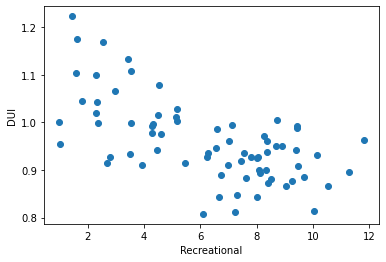

In [35]:
plt.scatter(x=normalized_df["Recreational"],y=normalized_df["DUI"])
plt.xlabel("Recreational")
plt.ylabel("DUI")

Interpret the plot.

This scatter plot shows that with more recreational use of marijuana the number of DUI's actually generally decreases. This may suprise most people. One possible explanation could be that as the popularity of recreational marijuana increased over time this led to less consumption of alcohol and thus less DUI's from alcohol intoxication. Although we must pay close attention that DUI's have only decreased by roughly 20% in this plot while recreational marijuana use has increased by over 10 times.

Using `normalized_df`, make a scatter plot data with "Recreational" on the x-axis and "Narcotics" on the y-axis.

Text(0, 0.5, 'Narcotics')

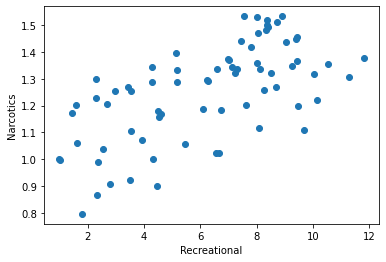

In [36]:
plt.scatter(x=normalized_df["Recreational"],y=normalized_df["Narcotics"])
plt.xlabel("Recreational")
plt.ylabel("Narcotics")

Interpet this plot.

This graph shows that as recreational marijuana use has increased so has the use of narcotics. Although we see a lot of discrepancy between the points, the overall trendline is a positive slope representing a positive correlation.

## Spatial visualization

### Sales data
Merge the county GeoDataFrame (left) with the original sales data (right) with a left join on the county names to a GeoDataFrame called `sales_gdf`. Check to make sure the merged object is a GeoDataFrame, print the shape, and inspect the head.

In [54]:
sales_gdf = pd.merge(left=co_counties_gdf,
                    right=sales_df,
                    how="left",
                    left_on="county",
                    right_on="County")

sales_gdf = sales_gdf.to_crs(epsg='3857')
type(sales_gdf)

geopandas.geodataframe.GeoDataFrame

In [55]:
sales_gdf.shape

(5418, 13)

In [56]:
sales_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,Month,County,Sales,Type
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-11544470.336 4865929.356, -11544464...",2014-01-01,Adams,683098.0,Medical
1,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-11544470.336 4865929.356, -11544464...",2014-01-01,Adams,NaN,Recreational
2,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-11544470.336 4865929.356, -11544464...",2014-02-01,Adams,NaN,Recreational
3,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-11544470.336 4865929.356, -11544464...",2014-02-01,Adams,454940.0,Medical
4,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-11544470.336 4865929.356, -11544464...",2014-03-01,Adams,NaN,Recreational


Filter the data to "Recreational" sales in December 2014. Visualize the "Sales" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm colormap](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html).

In [57]:
filtered_2014 = sales_gdf[sales_gdf["Month"]=="2014-12-01"]
filtered_2014 = filtered_2014[filtered_2014["Type"]=="Recreational"]

In [58]:
import geoplot.crs as gcrs

In [59]:
filtered_2014.crs

{'init': 'epsg:3857', 'no_defs': True}

<AxesSubplot:>

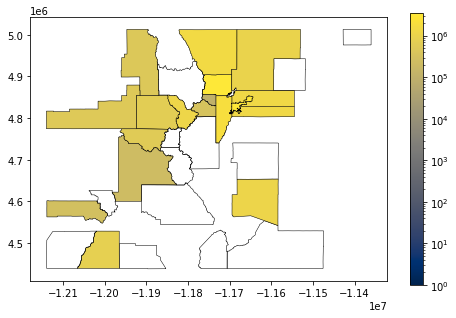

In [60]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z = np.exp(X**2 - Y**2)

f,ax1 = plt.subplots(figsize=(8,5))

filtered_2014.plot(column="Sales",
              norm=colors.LogNorm(vmin=1, vmax=3500000),#Z.max()),
                edgecolor='k',
               lw=.5,
              cmap="cividis",#'PuBu_r',
               legend=True,
              ax=ax1)


Filter the data to "Recreational" sales in December 2019. Visualize the "Sales" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm colormap](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html).

In [62]:
filtered_2019 = sales_gdf[sales_gdf["Month"]=="2019-12-01"]
filtered_2019 = filtered_2019[filtered_2019["Type"]=="Recreational"]

<AxesSubplot:title={'center':'2014'}>

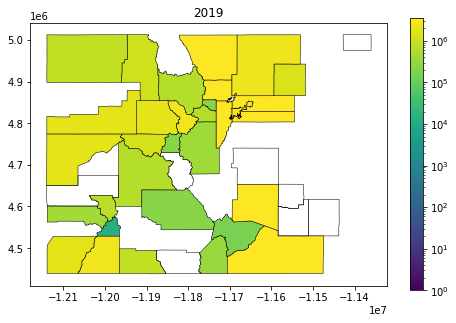

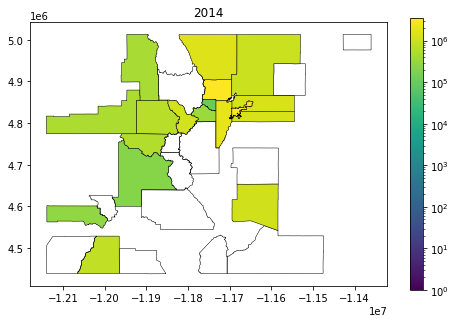

In [94]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z = np.exp(-X**2 - Y**2)

f,ax1 = plt.subplots(figsize=(8,5))


filtered_2019.plot(column="Sales",
              norm=colors.LogNorm(vmin=1, vmax=3500000),#Z.max()),
                edgecolor='k',
               lw=.5,
           #   cmap="cividis",#'PuBu_r',
               legend=True,
              ax=ax1)

plt.title("2019")
f,ax2 = plt.subplots(figsize=(8,5))

plt.title("2014")
filtered_2014.plot(column="Sales",
              norm=colors.LogNorm(vmin=1, vmax=3500000),#Z.max()),
                edgecolor='k',
               lw=.5,
           #   cmap="cividis",#'PuBu_r',
               legend=True,
              ax=ax2)

Interpet some changes you observe between the two maps.

Here we see that the number of counties that sold any number of recreational marijuana increased substantially from 2014 to 2019. This is visible because the 2014 map has many counties that reported no data, however these counties report sales in the 2019 map. 

### Crime data

Merge `co_counties_gdf` (left) with `crime_df` (right) into a GeoDataFrame called `crime_gdf`. Check to make sure the merged object is a GeoDataFrame, print the shape, and inspect the head.

In [70]:
crime_gdf = pd.merge(left=co_counties_gdf,
                    right=crime_df,
                    how="left",
                    left_on="county",
                    right_on="County")
type(crime_gdf)

geopandas.geodataframe.GeoDataFrame

In [71]:
crime_gdf.shape

(10417, 13)

In [72]:
crime_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,Month,County,Type,Arrests
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-01-01,Adams,DUI,301.0
1,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-01-01,Adams,Narcotics,232.0
2,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-02-01,Adams,DUI,369.0
3,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-02-01,Adams,Narcotics,221.0
4,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",2013-03-01,Adams,DUI,446.0


Filter the data to "DUI" sales in December 2014. Visualize the "Arrests" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html) or [symlognorm](https://matplotlib.org/3.3.1/gallery/userdemo/colormap_normalizations_symlognorm.html#sphx-glr-gallery-userdemo-colormap-normalizations-symlognorm-py).

In [73]:
_f = crime_gdf[crime_gdf["Month"]=="2014-12-01"]
crime_filtered_2014 = _f[_f["Type"]=="DUI"]

<AxesSubplot:>

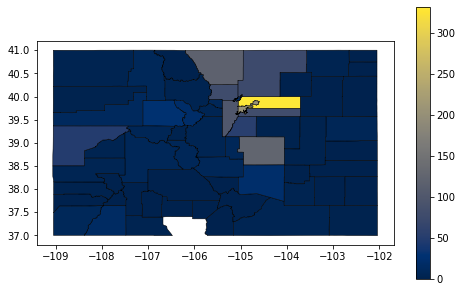

In [74]:
f,ax = plt.subplots(figsize=(8,5))

crime_filtered_2014.plot(column="Arrests",
                        edgecolor='k',
                       lw=.5,
                       cmap="cividis",
                       legend=True,
                        ax=ax)

Filter the data to "DUI" sales in December 2019. Visualize the "Arrests" as a choropleth. Bonus points for using a basemap. Extra bonus points for using a [lognorm](https://matplotlib.org/3.1.0/gallery/userdemo/colormap_normalizations_lognorm.html) or [symlognorm](https://matplotlib.org/3.3.1/gallery/userdemo/colormap_normalizations_symlognorm.html#sphx-glr-gallery-userdemo-colormap-normalizations-symlognorm-py).

In [75]:
_f2019 = crime_gdf[crime_gdf["Month"]=="2019-12-01"]
crime_filtered_2019 = _f2019[_f2019["Type"]=="DUI"]

Text(0.5, 1.0, '2014')

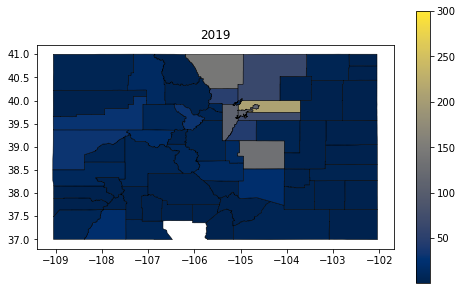

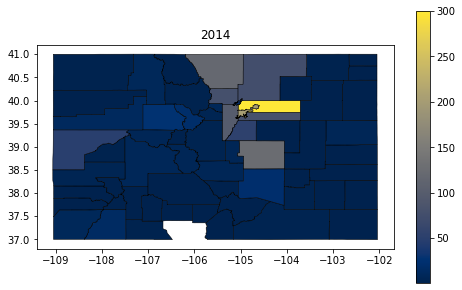

In [93]:
f,ax1 = plt.subplots(figsize=(8,5))

crime_filtered_2019.plot(column="Arrests",
                        edgecolor='k',
                       lw=.5,
                         vmin=1,
                         vmax=300,
                       cmap="cividis",
                       legend=True,
                        ax=ax1)
plt.title("2019")
f,ax2 = plt.subplots(figsize=(8,5))

crime_filtered_2014.plot(column="Arrests",
                          vmin=1,
                         vmax=300,
                        edgecolor='k',
                       lw=.5,
                       cmap="cividis",
                       legend=True,
                        ax=ax2)
plt.title("2014")

Interpet some changes you observe between the two maps.

Here we see that the general crime level of the counties decreased from 2014 to 2019. Most counties in the 2019 map appear to have a darker color than the 2014 map which represents a decrease in crime activity.

### Changes in crime for legalizing vs. non-legalizing counties

From the December 2019 recreational GeoDataFrame you made, identify the unique counties that had reported recreational cannabis sales. Save this as `rec_counties_l`. Note that this is an inaccurate enumeration of counties with legalized cannabis salies 

In [85]:
rec_counties_1 = filtered_2019["county"].unique()

From the Colorado counties GeoDataFrame, identify all the unique counties in Colorado. Save this as `all_counties_l`.

In [86]:
all_counties_1 = co_counties_gdf["county"].unique()

Using the `rec_counties_l` and `co_counties_l`, do a set operation to identify all the counties with no reported recreational cannabis sales. Save this as `nonrec_counties_l`. 

In [87]:
nonrec_counties_1 = set(all_counties_1) - set(rec_counties_1)
nonrec_counties_1

{'Alamosa',
 'Baca',
 'Broomfield',
 'Cheyenne',
 'Custer',
 'Delta',
 'Dolores',
 'Douglas',
 'Elbert',
 'Fremont',
 'Hinsdale',
 'Jackson',
 'Kiowa',
 'Kit Carson',
 'Lincoln',
 'Logan',
 'Mineral',
 'Phillips',
 'Prowers',
 'Rio Blanco',
 'Rio Grande',
 'Teller',
 'Washington',
 'Yuma'}

The code below will compute the change in crime for 2019 versus 2013 for each county.

In [88]:
crime_pivot_df = pd.pivot_table(crime_df,index=['Month','County'],columns='Type',values='Arrests')
crime_2019 = crime_pivot_df.loc['2019-01-01':'2019-12-01'].sum(level=1)
crime_2013 = crime_pivot_df.loc['2013-01-01':'2013-12-01'].sum(level=1)
crime_change_df = crime_2019 - crime_2013
crime_change_df.reset_index(inplace=True)
crime_change_df.columns.name = None
crime_change_df.head()

,County,DUI,Narcotics
0,Adams,-1747.0,109.0
1,Alamosa,38.0,79.0
2,Arapahoe,-543.0,-183.0
3,Archuleta,-15.0,9.0
4,Baca,-17.0,-3.0


Make a new column in `crime_change_df` called "Rec" that is a Boolean value of whether that county had any reported recreational sales.

In [89]:
crime_change_df["Rec"] = ~crime_change_df["County"].isin(nonrec_counties_1)
crime_change_df["Rec"]

0      True
1     False
2      True
3      True
4     False
      ...  
60     True
61    False
62    False
63     True
64    False
Name: Rec, Length: 65, dtype: bool

Make a seaborn `barplot` with "Rec" on the x-axis and "DUI" on the y-axis.

<AxesSubplot:xlabel='Rec', ylabel='DUI'>

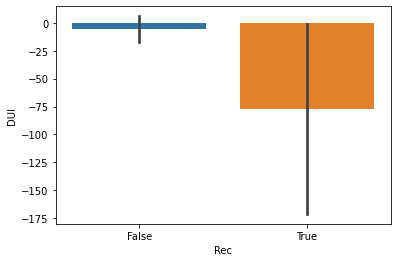

In [90]:
sb.barplot(data=crime_change_df, x="Rec",y="DUI")

Make a seaborn `barplot` with "Rec" on the x-axis and "Narcotics" on the y-axis.

<AxesSubplot:xlabel='Rec', ylabel='Narcotics'>

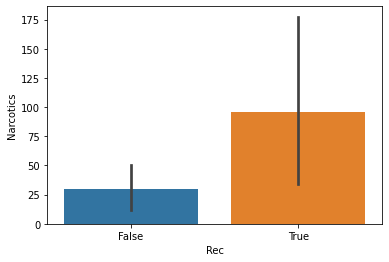

In [91]:
sb.barplot(data=crime_change_df, x="Rec",y="Narcotics")

Here's a statistical test for whether the observed differences are statistically significant.

In [92]:
from scipy import stats 

rec_dui_changes = crime_change_df.loc[crime_change_df['County'].isin(rec_counties_1),'DUI']
nonrec_dui_changes = crime_change_df.loc[crime_change_df['County'].isin(nonrec_counties_1),'DUI']

stats.ttest_ind(rec_dui_changes,nonrec_dui_changes,equal_var=False)

Ttest_indResult(statistic=-1.5881060339389734, pvalue=0.12032032904879957)

In [94]:
rec_narcotics_changes = crime_change_df.loc[crime_change_df['County'].isin(rec_counties_1),'Narcotics']
nonrec_narcotics_changes = crime_change_df.loc[crime_change_df['County'].isin(nonrec_counties_1),'Narcotics']

stats.ttest_ind(rec_narcotics_changes,nonrec_narcotics_changes,equal_var=False)

Ttest_indResult(statistic=1.7108143224033967, pvalue=0.09428298061837191)

## Discuss
Interpet the observed changes in crime statistics between 2013 and 2019 for legalizing and non-legalizing counties.

The previous barplots showed us that counties who legalized recreational marijuana saw a dramatic decrease in DUI's as opposed to counties who did not legalize it (these counties saw little difference in DUI's). However, in terms of Narcotics usage, the counties who legalized recreational marijuana saw a dramatic increase whereas the counties who did not saw a small increase. Therefore, our data points to obvious pros and cons of legalizing recreational marijuana. 

As shown with this data, it is important to remember that policy changes can have massive impacts on society in ways that we may not even recognize, an example being the decrease in DUI's when legalizing recreational marijuana. This is why it is so important for countrys, cities, and counties to use data to analyze other countrys, cities, and counties to determine what policy creates positive results for their constituents. Perhaps if data was a bigger part of policy making we may have a healthier governing system.

## Appendix

Here's the steps I took to collect and clean up some of the data used for this module. **There's nothing you need to run in here to complete any part of this assignment**, I just share it in the interests of transparency and supporting motivated learners. 

Libraries only needed for the appendix.

In [ ]:
import requests, os, re, time
from bs4 import BeautifulSoup
from urllib.parse import quote, unquote
from datetime import datetime
from io import BytesIO

### Sales reports
The Colorado Department of Revenue's [Manrijuana Sales Reports](https://revenue.colorado.gov/data-and-reports/marijuana-data/marijuana-sales-reports) stores Excel files on a Google Drive.

First, get all the links to each month's report by retrieving and parsing the markup from the website.

In [ ]:
# Get the raw HTML of the page
raw = requests.get('https://revenue.colorado.gov/data-and-reports/marijuana-data/marijuana-sales-reports')

# Turn into Soup
soup = BeautifulSoup(raw.text)

# Find the elements corresponding to the containers with the yearly data
containers = soup.find_all('dl',{'class':'ckeditor-accordion'})

Second, download all the Excel files. 

Confirm we got them all.

In [ ]:
sorted(excel_files.keys())

Define a function to parse the files.

In [ ]:
def clean_excel(_df):
    
    # Drop first 5 rows
    _df = _df.drop(index=range(5)).reset_index(drop=True)
    
    # Drop empty column
    _df = _df.dropna(how='all',axis=1)
    
    # Rename columns
    _df.columns = ['Med County','Med Sales','Rec County','Rec Sales']
    
    # Find row for last medical and recreational sales
    last_med = _df[_df['Med County'].str.contains('Sum of NR Counties').fillna(False)].first_valid_index() - 1
    last_rec = _df[_df['Rec County'].str.contains('Sum of NR Counties').fillna(False)].first_valid_index() - 1

    # Slice to only those values
    med_sales = _df.loc[:last_med,['Med County','Med Sales']]
    rec_sales = _df.loc[:last_rec,['Rec County','Rec Sales']]
    
    # Rename columns
    med_sales.columns = ['County','Sales']
    rec_sales.columns = ['County','Sales']

    # Add type
    med_sales['Type'] = 'Medical'
    rec_sales['Type'] = 'Recreational'
    
    # Concatenate
    combined_df = pd.concat([med_sales,rec_sales],ignore_index=True)
    combined_df = combined_df.replace({'Sales':{'NR':np.nan}})

    return combined_df

Loop through files, parse out relevant data, and concatenate results together.

In [ ]:
cleaned_dict = {}

# Apply the function to each month's spreadsheet
for _month, _df in excel_files.items():
    try:
        cleaned_dict[_month] = clean_excel(_df)
    except:
        print(_month)
        pass

# Combine all the months of data together
combined_df = pd.concat(cleaned_dict.values(),keys=cleaned_dict.keys())

# Cleanup
combined_df = combined_df.reset_index(0).reset_index(drop=True)
combined_df = combined_df.rename(columns={'level_0':'Time'})

combined_df = combined_df.sort_values(['Time','County','Type'])

# Write to disk
combined_df.to_csv('colorado_monthly_cannabis_sales.csv',index=False)

print(combined_df.shape)
combined_df.tail()

Old method using files I manually downloaded.

In [ ]:
_dir = 'E:/Dropbox/Courses/2020 Fall - INFO 3401/Code and data/cannabis_sales/'
files = [f for f in os.listdir(_dir) if '.xlsx' in f]

data_dict = {}
# filename_prefixes = [i.strftime('%m%y') for i in pd.period_range('2014-01','2020-10',freq='1M')]

_dir = 'E:/Dropbox/Courses/2020 Fall - INFO 3401/Code and data/cannabis_sales/'
files = [f for f in os.listdir(_dir) if '.xlsx' in f]

for month,df in files:
    try:
        period = pd.Period(datetime.strptime(f.split('_')[0],'%m%y'),freq='1M')
        data_dict[period] = pd.read_excel(_dir+f) #,skiprows=5)
    except:
        print(f)
        pass

print(len(data_dict))

### Crime

https://coloradocrimestats.state.co.us/public/View/

In [ ]:
co_dui_1719 = pd.read_csv('DUI Arrests 2017-2019.csv',skiprows=3).dropna(how='all',axis=1)
co_dui_1316 = pd.read_csv('DUI Arrests 2013-2016.csv',skiprows=3).dropna(how='all',axis=1)

co_dui_df = pd.concat([co_dui_1316,co_dui_1719],ignore_index=True)
co_dui_df['Incident Date'] = pd.to_datetime(co_dui_df['Incident Date'])
co_dui_df = co_dui_df.drop(columns=['Arrest Offense for A and B Arrests'])

co_dui_df = pd.pivot_table(data = co_dui_df,
                           columns = 'Jurisdiction by Geography',
                           index = 'Incident Date',
                           values = 'Number of Arrestees'
                          )

co_dui_df = co_dui_df.fillna(0)

co_dui_df = co_dui_df.groupby(pd.Grouper(freq='1M')).sum().stack().reset_index()
co_dui_df.columns = ['Time','County','Arrests']
co_dui_df['Time'] = co_dui_df['Time'].dt.to_period(freq='1M')

_rename = {c:c.replace(' County','') for c in co_dui_df['County'].unique().tolist() if 'County' in c}
co_dui_df = co_dui_df.replace({'County':_rename})

# co_dui_df.to_csv('co_county_dui.csv')

# co_dui_df.head()

In [ ]:
co_narcotics_1719 = pd.read_csv('Narcotics Arrests 2017-2019.csv',skiprows=3).dropna(how='all',axis=1)
co_narcotics_1316 = pd.read_csv('Narcotics Arrests 2013-2016.csv',skiprows=3).dropna(how='all',axis=1)

co_narcotics_df = pd.concat([co_narcotics_1316,co_narcotics_1719],ignore_index=True)
co_narcotics_df['Incident Date'] = pd.to_datetime(co_narcotics_df['Incident Date'])
co_narcotics_df = co_narcotics_df.drop(columns=['Arrest Offense for A and B Arrests'])

co_narcotics_df = pd.pivot_table(data = co_narcotics_df,
                           columns = 'Jurisdiction by Geography',
                           index = 'Incident Date',
                           values = 'Number of Arrestees'
                          )

co_narcotics_df = co_narcotics_df.fillna(0)

co_narcotics_df = co_narcotics_df.groupby(pd.Grouper(freq='1M')).sum().stack().reset_index()
co_narcotics_df.columns = ['Time','County','Arrests']
co_narcotics_df['Time'] = co_narcotics_df['Time'].dt.to_period(freq='1M')

_rename = {c:c.replace(' County','') for c in co_narcotics_df['County'].unique().tolist() if 'County' in c}
co_narcotics_df = co_narcotics_df.replace({'County':_rename})

# co_narcotics_df.to_csv('co_county_narcotics.csv')

# co_narcotics_df.head()

In [ ]:
co_county_crime_df = pd.concat([co_dui_df,co_narcotics_df],
                               keys=['DUI','Narcotics'],
                               names=['Type']
                              ).reset_index(0)
co_county_crime_df = co_county_crime_df[['Time','County','Type','Arrests']]

co_county_crime_df = co_county_crime_df.sort_values(['Time','County','Type']).reset_index(drop=True)

co_county_crime_df.to_csv('co_county_crime.csv',index=False)

co_county_crime_df.head()

In [ ]:
co_county_crime_df = pd.merge(left = co_dui_df,
                              right = co_narcotics_df,
                              how = 'outer',
                              left_on = ['Time','County'],
                              right_on = ['Time','County']
                             )

co_county_crime_df.to_csv('co_county_crime.csv',index=False)

co_county_crime_df.head()